In [10]:
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../grl.mplstyle')
import numpy as np
import pandas as pd
import os
import pickle 

from helper import plot_literature, compute_sigma_color, MinorSymLogLocator

%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### To-do
Right now there is one case that is not matching between the dissipation and the vorticity P=0.016 v.s. P=0.03


### New plots after correcting dissipation

In [2]:
paths = ['/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C1',
         '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C2',
         '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C3',
         '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4',
         '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C5',]

In [22]:
#### Epsilon has only 110, 130, 150, 170 slices, should be enough to ger meaningful stats? ####
basepath = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
label = 'C2'
filename = basepath + label + '/epsilon1d_interp.nc'
ds = xr.open_dataset(filename, engine='h5netcdf')

In [23]:
ds

<xarray.Dataset>
Dimensions:  (t: 4, z: 210)
Coordinates:
  * t        (t) int64 110 130 150 170
  * z        (z) float64 -20.0 -19.9 -19.8 -19.7 -19.6 ... 0.5 0.6 0.7 0.8 0.9
Data variables:
    epsilon  (t, z) float32 ...
    omegaxp  (t, z) float32 ...
    omegayp  (t, z) float32 ...
    omegazp  (t, z) float32 ...
Attributes:
    description:  Interpolated and averaged epsilon and vorticity.
    sourcepath:   /projects/DEIKE/jiarongw/multilayer/JFM/field_new_200m_P0.0...
    L:            200
    P:            0.01
    Re:           40000
    LEVEL:        10
    NL:           15
    rand:         2
    Htheta:       0.503
    H:            40.0
    label:        C2

In [36]:
basepath = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'
cases = ['C1','C2','C3','C4','C5']
tbin = [160,180]
sigmas, Hss, ccs = compute_sigma_color(cases, tbin=tbin, path=basepath)

0.3326708884371681
0.9835309239593839
0.4536975610934646
1.0968822859388982
0.6450112074534851
1.3395765388439067
0.7125853024377504
1.458008303070497
0.867818379017447
1.6964016417466854


(0.001, 14)

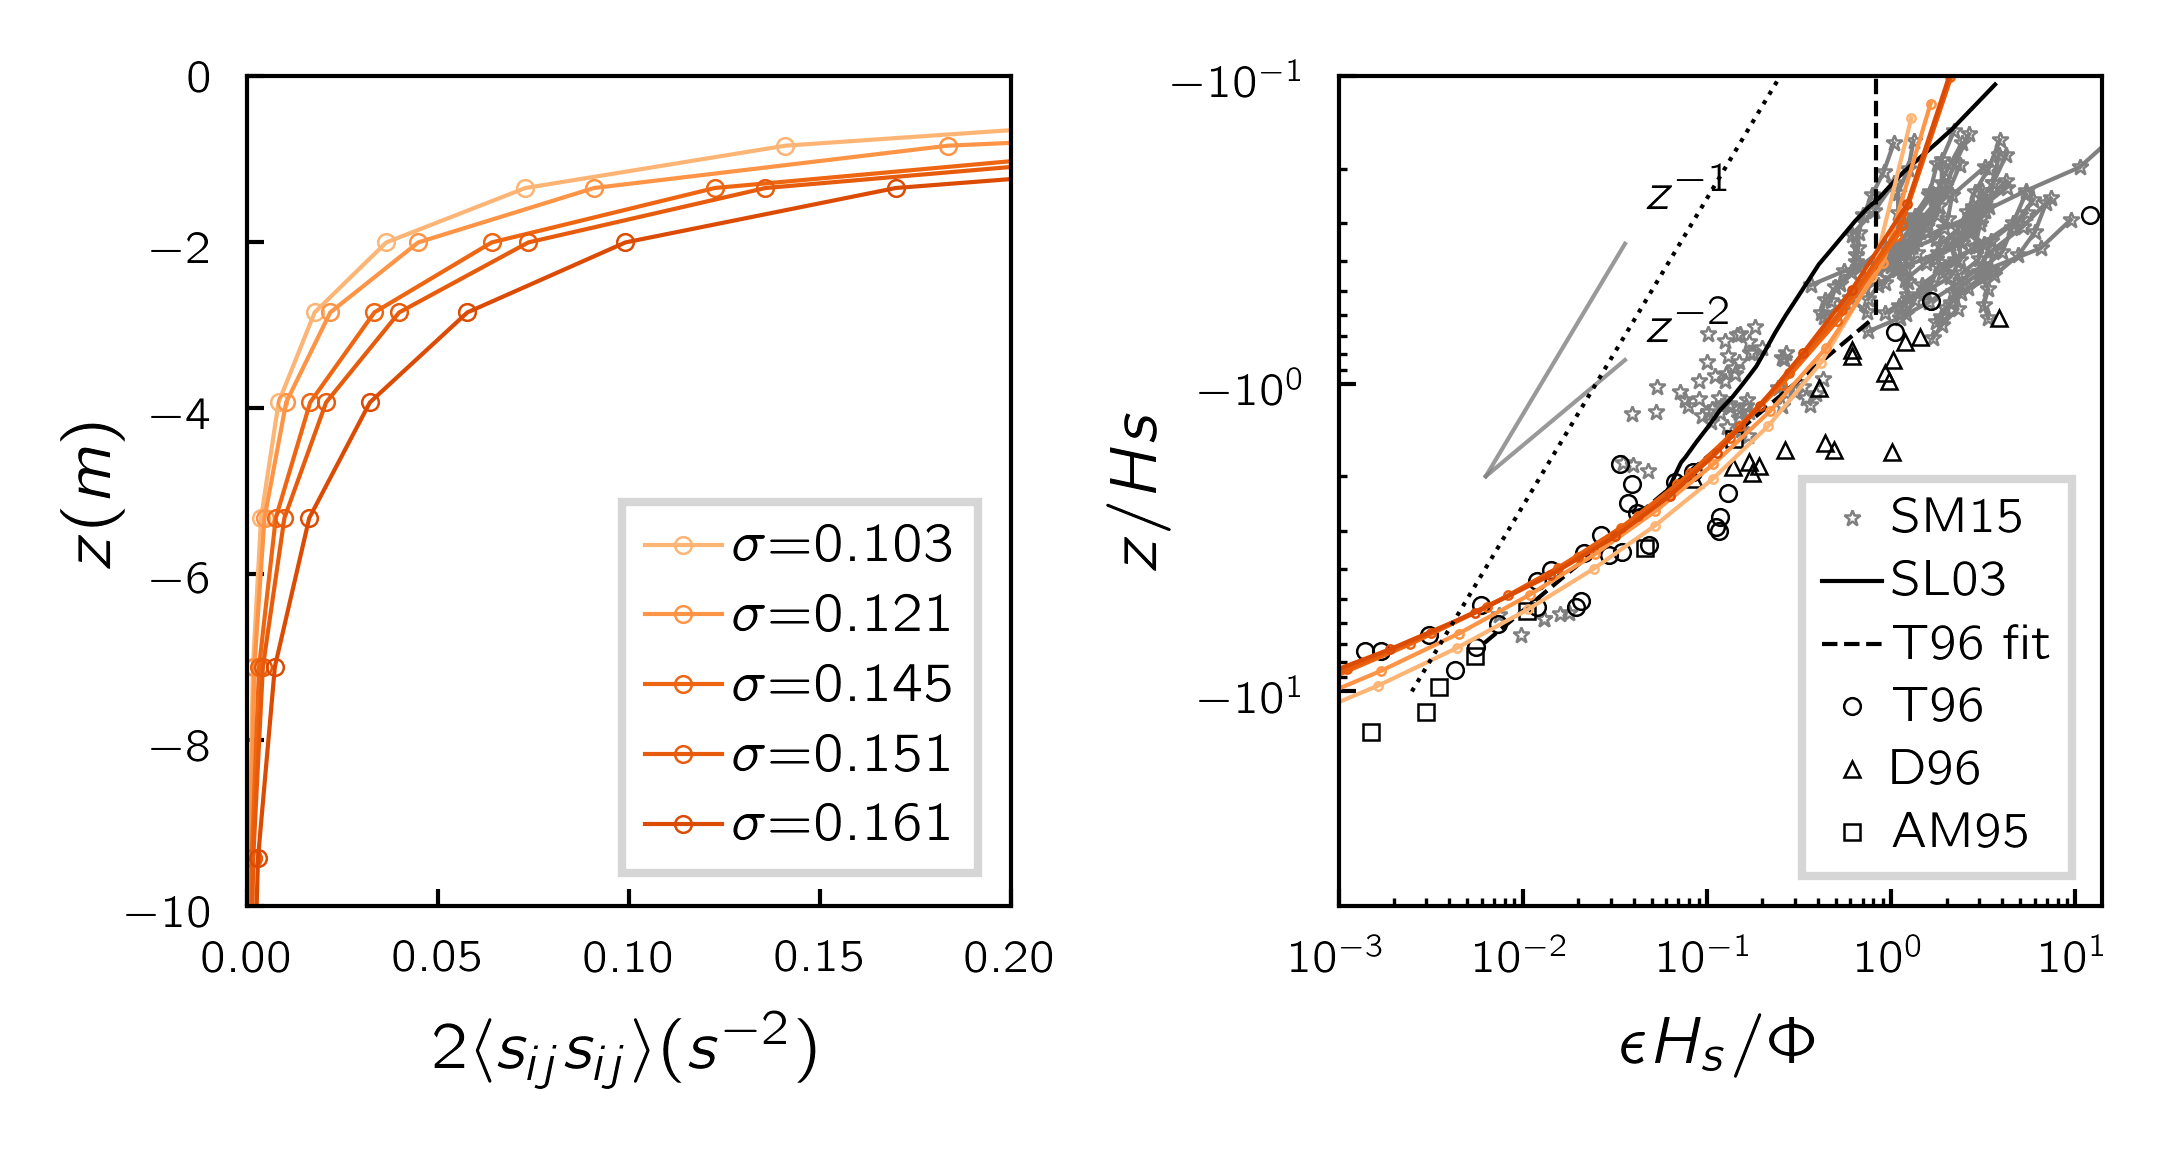

In [41]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize=[3.5,1.8])

path = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
plot_literature(axes[1], path)

for label, sigma, Hs, cc in zip(cases, sigmas, Hss, ccs):
    filename = basepath + label + '/epsilon1d.nc'
    ds = xr.open_dataset(filename, engine='h5netcdf')
    epsilon_aver = ds.epsilon.sel(t=(tbin[0]+tbin[1])/2, method='nearest') # Didn't do multi time step average
    z_aver = ds.z.sel(t=(tbin[0]+tbin[1])/2, method='nearest')
    axes[0].plot(epsilon_aver.values, z_aver.values, marker='o', color=cc, label='$\sigma$={%.3f}' %sigma)
    axes[0].set_title('')
    phi = epsilon_aver.integrate(['z']).values
    print(phi)
    print(Hs)
    axes[1].plot(epsilon_aver.values*Hs/phi, z_aver.values/Hs, '.-', c=cc)
    ds.close()

# Law of Wall   
y = np.linspace(-10, -0.1, 100) 
axes[1].plot(1/0.4*1/abs(y)/100, y, ':',c='k')   
    
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right', fontsize=6, handlelength=1.2)
axes[0].set_ylim([-10,0])
axes[0].set_xlim([0,2*10**(-1)])
# axes[0].set_xlabel('$\sum \omega_i^2 (s^{-2})$')
axes[0].set_xlabel(r'$2\langle s_{ij} s_{ij}\rangle (s^{-2})$')
axes[0].set_ylabel('$z (m)$', labelpad=0)

# axes[1].set_xlabel('$\sum \omega_i^2 H_s/\Phi$')
axes[1].set_xlabel('$\epsilon H_s/\Phi$')
axes[1].set_ylabel('$z/Hs$', labelpad=0)
axes[1].set_xscale('log'); 
axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].yaxis.set_minor_locator(MinorSymLogLocator(1e-2))
axes[1].set_ylim([-50,-0.1])
axes[1].set_xlim([0.001,14])
# plt.savefig('../figures/multilayer-diss/fig4.pdf', bbox_inches='tight')

3.0199794541020735
2.337449507487178
2.5782513952461525
2.612462803133568
2.402512105887615


(0.001, 14)

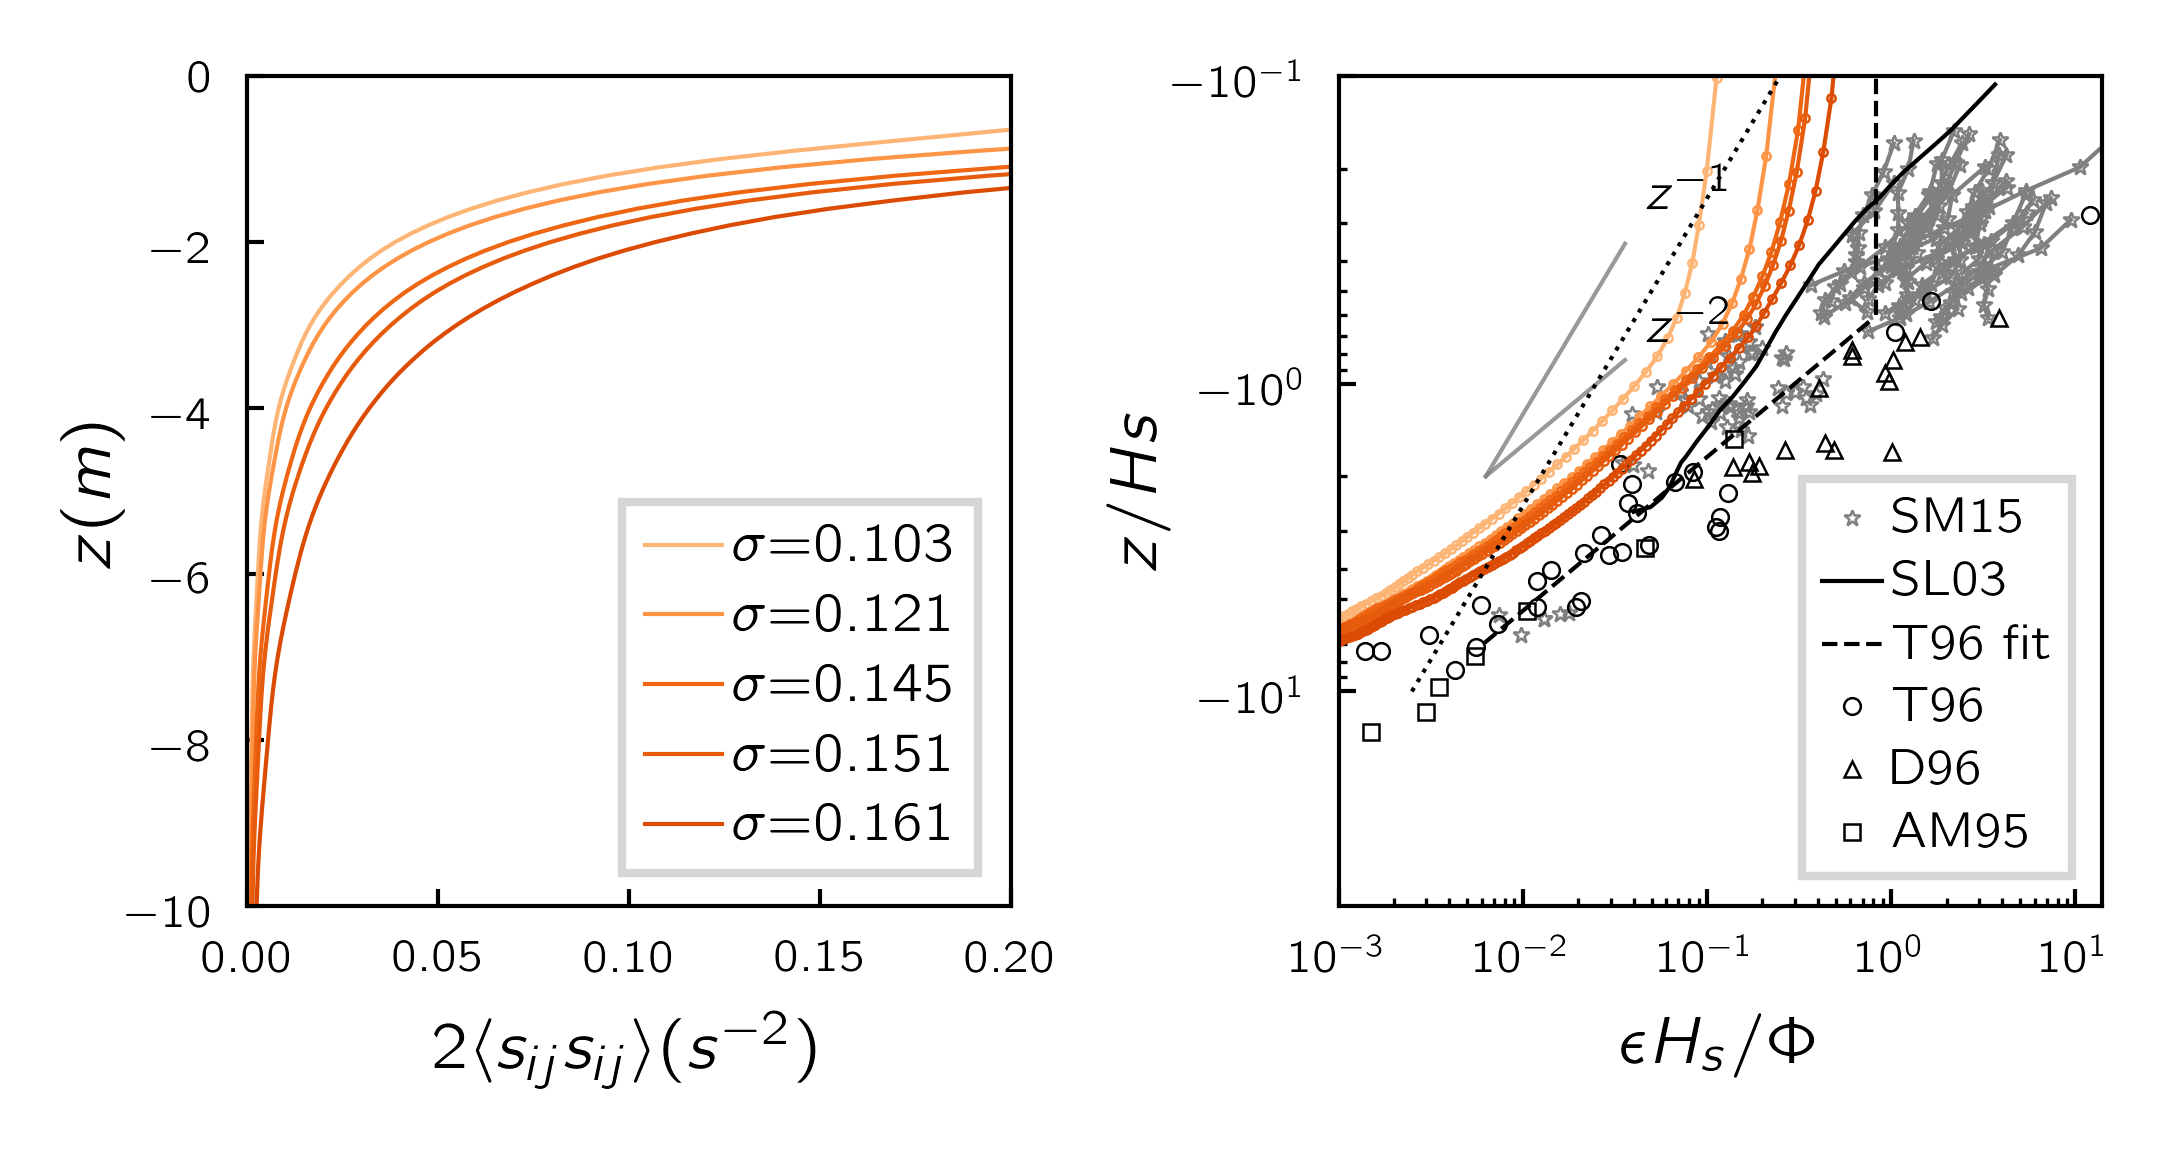

In [15]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize=[3.5,1.8])

path = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
plot_literature(axes[1], path)

cases = ['C1','C2','C3','C4','C5']
sigmas, Hss, ccs = compute_sigma_color(cases)
basepath = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'

t = 170

for label, sigma, Hs, cc in zip(cases, sigmas, Hss, ccs):
    filename = basepath + label + '/epsilon1d_interp.nc'
    ds = xr.open_dataset(filename, engine='h5netcdf')
    ds.epsilon.sel(t=t).plot(y='z', ax=axes[0], color=cc, label='$\sigma$={%.3f}' %sigma)
    axes[0].set_title('')
    phi = ds.sel(t=t).epsilon.integrate('z')
    print(phi.values)
    axes[1].plot(ds.epsilon.sel(t=t)*Hs/phi, ds.z/Hs, '.-', c=cc)
    ds.close()

# Law of Wall   
y = np.linspace(-10, -0.1, 100) 
axes[1].plot(1/0.4*1/abs(y)/100, y, ':',c='k')   
    
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right', fontsize=6, handlelength=1.2)
axes[0].set_ylim([-10,0])
axes[0].set_xlim([0,2*10**(-1)])
# axes[0].set_xlabel('$\sum \omega_i^2 (s^{-2})$')
axes[0].set_xlabel(r'$2\langle s_{ij} s_{ij}\rangle (s^{-2})$')
axes[0].set_ylabel('$z (m)$', labelpad=0)

# axes[1].set_xlabel('$\sum \omega_i^2 H_s/\Phi$')
axes[1].set_xlabel('$\epsilon H_s/\Phi$')
axes[1].set_ylabel('$z/Hs$', labelpad=0)
axes[1].set_xscale('log'); 
axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].yaxis.set_minor_locator(MinorSymLogLocator(1e-2))
axes[1].set_ylim([-50,-0.1])
axes[1].set_xlim([0.001,14])
# plt.savefig('../figures/multilayer-diss/fig4.pdf', bbox_inches='tight')

0.003203396821173204
0.008645708420613456
0.03481656122497796
0.05446955188634518
0.138187252176708


(0.001, 14)

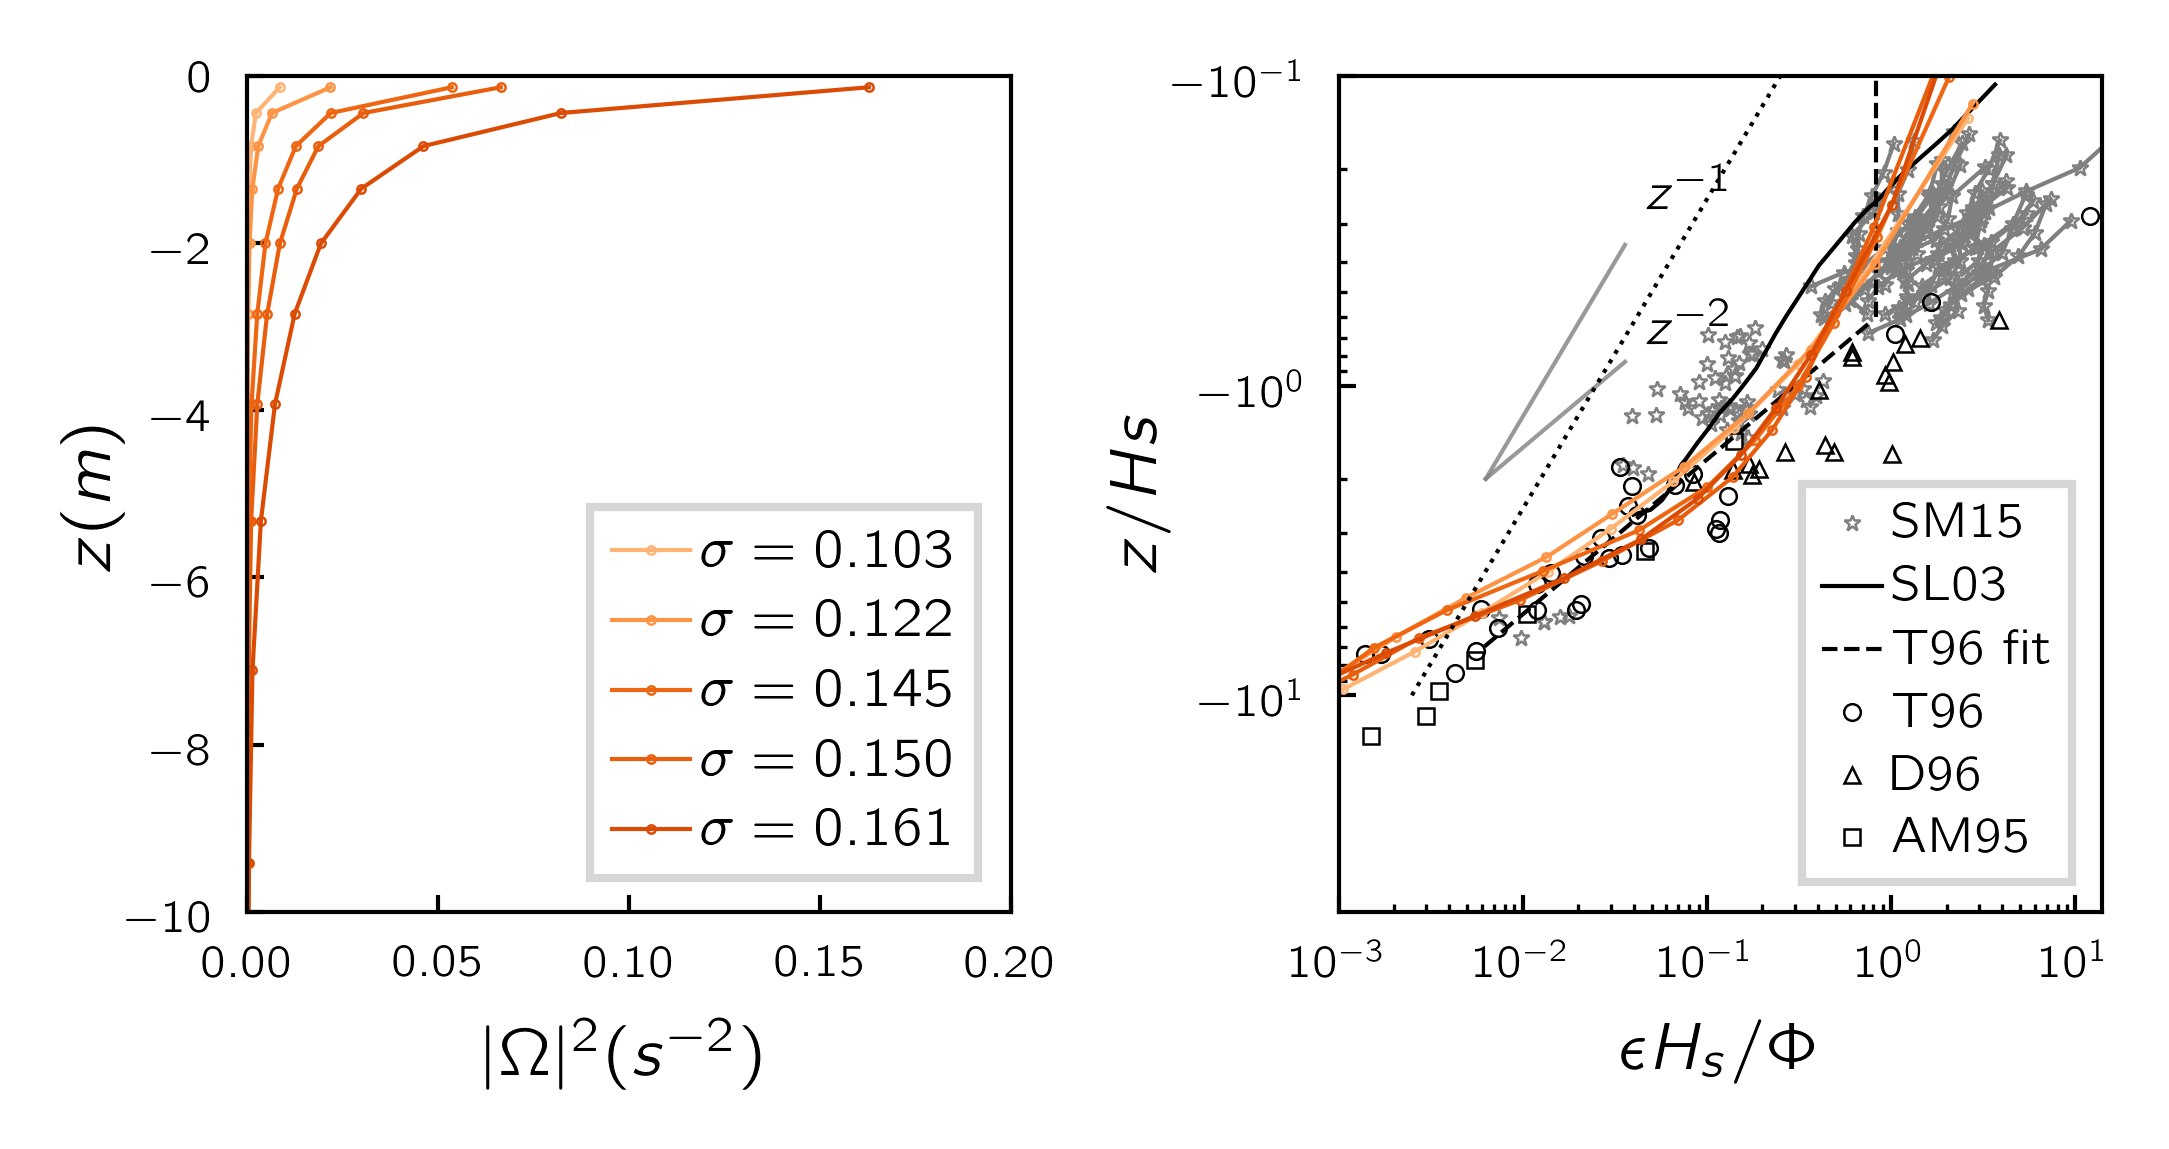

In [62]:
fig, axes = plt.subplots(1, 2, constrained_layout = True, figsize=[3.5,1.8])

path = '/Users/jiarongw/Data/multilayer_data/JFM2023/'
plot_literature(axes[1], path)

t = 160 # Plot the last time slice
tbin = 170 # The corresponding center of bins in the dissipation file
for label in ('C1','C2','C3','C4','C5'):
    filename = path + 'compilation/' + label + '/field'  + '%g.nc' %t 
    ds = xr.open_dataset(filename, engine='h5netcdf')
    omega2 = ds.omegax**2 + ds.omegay**2 + ds.omegaz**2
    omega2mean = omega2.mean(["t","x","y"])
    zmean = ds.z.mean(["x","y"]).to_numpy()
    ds.close()

    # For normalization
    phi = np.trapz(omega2mean, x=zmean)
    print(phi)
    filename = path + 'compilation/' + 'dissipation_' + label + '.nc'
    diss = xr.open_dataset(filename, engine='h5netcdf')
    Hs = diss.Hs.sel(tbin=tbin).values
    sigma = diss.sigma.sel(tbin=tbin).values
    
    cc = mpl.colormaps['Oranges']((sigma-0.05)/(0.2-0.05)) 
    axes[0].plot(omega2mean, zmean, '.-', label=r'$\sigma=%.3f$' %sigma, c=cc)
    # axes[0].plot(epsilon,z,'.-',label=r'$\sigma=%.3f$' %case.mu_plateau, c=case.cc)
    axes[1].plot(omega2mean[3:]*Hs/phi,zmean[3:]/Hs,'.-',c=cc)

# Law of Wall   
y = np.linspace(-10, -0.1, 100) 
axes[1].plot(1/0.4*1/abs(y)/100, y, ':',c='k')   
    
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right', fontsize=6, handlelength=1.2)
axes[0].set_ylim([-10,0])
axes[0].set_xlim([0,2*10**(-1)])
# axes[0].set_xlabel('$\sum \omega_i^2 (s^{-2})$')
axes[0].set_xlabel(r'$|\mathbf{\Omega}|^2 (s^{-2})$')
axes[0].set_ylabel('$z (m)$', labelpad=0)

# axes[1].set_xlabel('$\sum \omega_i^2 H_s/\Phi$')
axes[1].set_xlabel('$\epsilon H_s/\Phi$')
axes[1].set_ylabel('$z/Hs$', labelpad=0)
axes[1].set_xscale('log'); 
axes[1].set_yscale('symlog', linthresh=1e-2)
axes[1].yaxis.set_minor_locator(MinorSymLogLocator(1e-2))
axes[1].set_ylim([-50,-0.1])
axes[1].set_xlim([0.001,14])
# plt.savefig('../figures/multilayer-diss/fig4.pdf', bbox_inches='tight')

In [ ]:
cases = ['C1','C2','C3','C4','C5']
basepath = '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/'

tcs=[110,130,150,170]
dicts = []
for label in cases:
    phis = []
    filename = basepath + label + '/epsilon1d.nc'
    ds = xr.open_dataset(filename, engine='h5netcdf')
    for tc in tcs:
        phi = ds.sel(t=tc, method='nearest').epsilon.integrate('z')
        phis.append(phi.values)
    ds.close()
    phi_dict = {'label':label, 'tcs':tcs, 'phis':np.array(phis).flatten()}
    dicts.append(phi_dict)

In [49]:
dicts

[{'label': 'C1',
  'tcs': [110, 130, 150, 170],
  'phis': array([0.31323488, 0.31865655, 0.33000615, 0.33267089])},
 {'label': 'C2',
  'tcs': [110, 130, 150, 170],
  'phis': array([0.4251461 , 0.43968254, 0.4491455 , 0.45369756])},
 {'label': 'C3',
  'tcs': [110, 130, 150, 170],
  'phis': array([0.66557801, 0.67246108, 0.65341181, 0.64501121])},
 {'label': 'C4',
  'tcs': [110, 130, 150, 170],
  'phis': array([0.7652252 , 0.75416837, 0.72523091, 0.7125853 ])},
 {'label': 'C5',
  'tcs': [110, 130, 150, 170],
  'phis': array([0.93433283, 0.87838242, 0.86785707, 0.86781838])}]